1. Phase : Data Acquisition & Preprocessing : 

1.1. Review Extraction using pandas and Beautiful Soup 

In [1]:
pip install pandas

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
#Creating Empty lists to store the scraped data
usernames = [] 
addresses = [] 
reviews = [] 
ratings = [] 
dates = [] 

for i in range(1 , 20) : 
    #URL of "Redmi 12 5G(mobile I am currently using)" review page
    url = "https://www.flipkart.com/redmi-12-5g-moonstone-silver-128-gb/product-reviews/itm6485286f96fb0?pid=MOBGS7JGZBZKPGGB&lid=LSTMOBGS7JGZBZKPGGBG2917R&marketplace=FLIPKART&page="+str(i) 
    r = requests.get(url) 
    soup = BeautifulSoup(r.text , "lxml")

    #Adding username to list 
    username_soup = soup.find_all("p" , class_ ="_2NsDsF AwS1CA") 
    for i in username_soup : 
        username_temp = i.text 
        usernames.append(username_temp) 


    #Adding User address to list 
    address_soup = soup.find_all("p" , class_ = "MztJPv" ) 
    
    for i in address_soup : 
        address_temp = i.text
        addresses.append(address_temp)  
   

    #Adding Reviews to list 
    reviews_soup = soup.find_all("div" , class_ = "ZmyHeo" )  
    
    for i in reviews_soup : 
        reviews_temp = i.text
        reviews.append(reviews_temp)  


    #Adding Rating to list 
    rating_soup = soup.find_all("div" , class_ = "XQDdHH Ga3i8K" ) 
    for i in rating_soup : 
        rating_temp = i.text
        ratings.append(rating_temp)  
    

    #Adding Date to list 
    date_soup = soup.find_all("p" , class_ ="_2NsDsF" ) 
    # print(address_soup) 
    for i in date_soup : 
        date_temp =  i.text
        if ',' in date_temp :
            dates.append(date_temp)   
    

print(usernames) 
print(len(usernames))

print(addresses) 
print(len(addresses))

print(reviews) 
print(len(reviews))

print(ratings) 
print(len(ratings))

print(dates)
print(len(dates)) 

['MIRZA KAZIM Ali BAIG', 'Dhanlaxmi  Kirana', 'Vishakha  Singh ', 'S K Saddam', 'ADIL FRAJ', 'Abdul Rahaman Mandal', 'Flipkart Customer', 'Rakesh Sarkar', 'DUSHASAN MAJHI', 'J kumar Jitu', 'Praveen  Yadav', 'Sushil Rajput', 'Binder  Wadali ', 'RAVI KUMAR MAHATO', 'Kiran Kumar', 'Vivek  Barve', 'Flipkart Customer', 'Jitendra Kumar', 'Abhishek  Singh', 'Ritu Kumari', 'APURV PADMAKAR GOTEPHODE', 'Sandip  Kundu', 'Abhilash', 'Shilu Bhaskar', 'Flipkart Customer', 'Sanjay  Das ', 'Flipkart Customer', 'Flipkart Customer', 'Mr.Basant Chaudhary', 'Flipkart Customer', 'Sk Amjad Ali', 'Reyansh Priyadarshy', 'Rama krishna Dadi', 'Saurabh Verma', 'Pavan A Gaitonde', 'DEBASHISH  GHOSH', 'Sanjay  Biswas', 'Shailesh  Kumar ', 'Sonu  Gangwar', 'Dipankar Saha', 'Tarun Kumar', 'Gilakara Venkatesh', 'Dilip  Kumar ', 'Divyanshu Rai', 'Mahi Khan', 'Golu Kumar  Paswan mohla', 'ENAMUL  HUSSAIN ', 'Sandeep Maadishetti ', 'Mukund Vilasrao Patil', 'Afsar mirza ', 'Bharath Bharup', 'Flipkart Customer', 'Flipkart 

In [6]:
#handling a missmatch between the number of rows 

min_len = min(len(usernames), len(addresses), len(reviews), len(ratings), len(dates))
print(min_len)

usernames = usernames[:min_len]
addresses = addresses[:min_len]
reviews = reviews[:min_len]
ratings = ratings[:min_len]
dates = dates[:min_len]

print(len(usernames))

print(len(addresses))

print(len(reviews))
 
print(len(ratings))

print(len(dates)) 

107
107
107
107
107
107


In [7]:
#Creating a dataframe
df = pd.DataFrame({"Username" : usernames , "Address" : addresses , "Reviews" : reviews , "Rating" : ratings , "Date" : dates } )
print(df)

                 Username                              Address  \
0    MIRZA KAZIM Ali BAIG           Certified Buyer, Kalaburgi   
1       Dhanlaxmi  Kirana              Certified Buyer, Chakan   
2        Vishakha  Singh             Certified Buyer, Bareilly   
3              S K Saddam  Certified Buyer, Nizamabad District   
4               ADIL FRAJ     Certified Buyer, Ranchi District   
..                    ...                                  ...   
102           Amir Pathan           Certified Buyer, New Delhi   
103                అనంత ఆ           Certified Buyer, Tadipatri   
104            Ajay Singh              Certified Buyer, Jaipur   
105            Sonu Kumar          Certified Buyer, Sheikhpura   
106            Amit kumar           Certified Buyer, New Delhi   

                                               Reviews Rating       Date  
0    Nice phone for normal uses fancy design .Front...      4  Nov, 2023  
1                                   Very niceREAD MORE   

In [8]:
#storing a data in CSV file
df.to_csv("C:/Users/prasa/Desktop/NLP_Project/flipkart_Redmi_12_5G_Revies.csv")

In [9]:
# Checking the structure of dataframe
print("Rows,Cols:", df.shape)
print(df.columns.tolist())
print(df.head(3))


# Droping duplicates and empty reviews
df = df.drop_duplicates(subset=['Reviews'])
df = df[df['Reviews'].notna() & (df['Reviews'].str.strip() != "")]
df = df.reset_index(drop=True)
print("After dedup & drop empty:", df.shape)


Rows,Cols: (107, 5)
['Username', 'Address', 'Reviews', 'Rating', 'Date']
               Username                     Address  \
0  MIRZA KAZIM Ali BAIG  Certified Buyer, Kalaburgi   
1     Dhanlaxmi  Kirana     Certified Buyer, Chakan   
2      Vishakha  Singh    Certified Buyer, Bareilly   

                                             Reviews Rating       Date  
0  Nice phone for normal uses fancy design .Front...      4  Nov, 2023  
1                                 Very niceREAD MORE      5  Mar, 2024  
2                 Sound quality is not goodREAD MORE      4  Sep, 2023  
After dedup & drop empty: (101, 5)


1.2. Data Cleaning :

In [10]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Install regex/bs4 if needed
# pip install beautifulsoup4 regex
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # removing HTML tags
    text = BeautifulSoup(str(text), "lxml").get_text(separator=" ")
    # removing urls 
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # Remove "Read More" or "READ MORE" etc.
    text = re.sub(r'read\s*more', '', text, flags=re.IGNORECASE)
    # remove weird repeated spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Appling basic cleaning and lowercasing
df['clean_review'] = df['Reviews'].apply(clean_text).str.lower()
df['clean_review'] = df['clean_review'].str.strip()
df.head(5)


,Username,Address,Reviews,Rating,Date,clean_review
0,MIRZA KAZIM Ali BAIG,"Certified Buyer, Kalaburgi",Nice phone for normal uses fancy design .Front...,4,"Nov, 2023",nice phone for normal uses fancy design .front...
1,Dhanlaxmi Kirana,"Certified Buyer, Chakan",Very niceREAD MORE,5,"Mar, 2024",very nice
2,Vishakha Singh,"Certified Buyer, Bareilly",Sound quality is not goodREAD MORE,4,"Sep, 2023",sound quality is not good
3,S K Saddam,"Certified Buyer, Nizamabad District",Osm very nice..... phone iam so happy thank yo...,5,"Apr, 2024",osm very nice..... phone iam so happy thank yo...
4,ADIL FRAJ,"Certified Buyer, Ranchi District",Really Awesome handset according to prise.Buy ...,4,"Dec, 2023",really awesome handset according to prise.buy ...


1.3. Language Identification & Translation (Handling Multilingualism): I have used langdetect to check the language in which reviews are written and have used googletrans model to trnslate the language of the review to english

In [12]:
pip install langdetect

In [13]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # for reproducibility

def detect_lang_safe(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['lang'] = df['clean_review'].apply(detect_lang_safe)
# show counts
print(df['lang'].value_counts().head())
# mark non-english
df['is_english'] = df['lang'].apply(lambda x: x.startswith('en'))
df.head(5)

#Checking the reviews written in languages other than english
# Filter all reviews detected as Danish
danish_reviews = df[df['lang'] == 'da'][['Reviews', 'clean_review']]

# Display them
print("Danish reviews found:", len(danish_reviews))
print(danish_reviews)

lang
en    72
af     5
cs     3
so     3
ro     3
Name: count, dtype: int64
Danish reviews found: 1
                                      Reviews  \
66  Redmi12 5g Phone design are goodREAD MORE   

                        clean_review  
66  redmi12 5g phone design are good  


In [14]:
# Install if not already installed
!pip install matplotlib seaborn

In [15]:
#Plot setup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\1966308141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')


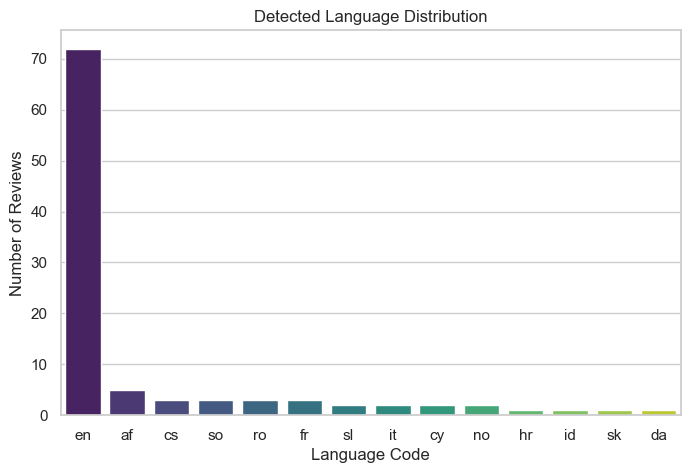

In [17]:
lang_counts = df['lang'].value_counts()

plt.figure()
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')
plt.title("Detected Language Distribution")
plt.xlabel("Language Code")
plt.ylabel("Number of Reviews")
plt.show()

In [18]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [19]:
from googletrans import Translator
translator = Translator()

def translate_if_not_english(row):
    if row['is_english']:
        return row['clean_review']
    # try translating non-english text to english
    try:
        res = translator.translate(row['clean_review'], dest='en')
        return res.text.lower()
    except Exception as e:
        # on failure return original and mark as untranslated
        return row['clean_review']

# Apply translation (this can be slower; try on a sample first)
df['eng_review'] = df.apply(translate_if_not_english, axis=1)
df.head(5)

,Username,Address,Reviews,Rating,Date,clean_review,lang,is_english,eng_review
0,MIRZA KAZIM Ali BAIG,"Certified Buyer, Kalaburgi",Nice phone for normal uses fancy design .Front...,4,"Nov, 2023",nice phone for normal uses fancy design .front...,en,True,nice phone for normal uses fancy design .front...
1,Dhanlaxmi Kirana,"Certified Buyer, Chakan",Very niceREAD MORE,5,"Mar, 2024",very nice,cs,False,very nice
2,Vishakha Singh,"Certified Buyer, Bareilly",Sound quality is not goodREAD MORE,4,"Sep, 2023",sound quality is not good,en,True,sound quality is not good
3,S K Saddam,"Certified Buyer, Nizamabad District",Osm very nice..... phone iam so happy thank yo...,5,"Apr, 2024",osm very nice..... phone iam so happy thank yo...,en,True,osm very nice..... phone iam so happy thank yo...
4,ADIL FRAJ,"Certified Buyer, Ranchi District",Really Awesome handset according to prise.Buy ...,4,"Dec, 2023",really awesome handset according to prise.buy ...,en,True,really awesome handset according to prise.buy ...


1.4. Lemmatization/Stemming/Tokenization:

In [20]:
# pip install nltk  

In [21]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize

def counts(text):
    sents = sent_tokenize(text)
    words = word_tokenize(text)
    return len(words), len(sents)

df['word_count'], df['sent_count'] = zip(*df['eng_review'].map(counts))
df[['eng_review','word_count','sent_count']].head()

,eng_review,word_count,sent_count
0,nice phone for normal uses fancy design .front...,15,1
1,very nice,2,1
2,sound quality is not good,5,1
3,osm very nice..... phone iam so happy thank yo...,11,1
4,really awesome handset according to prise.buy ...,8,1


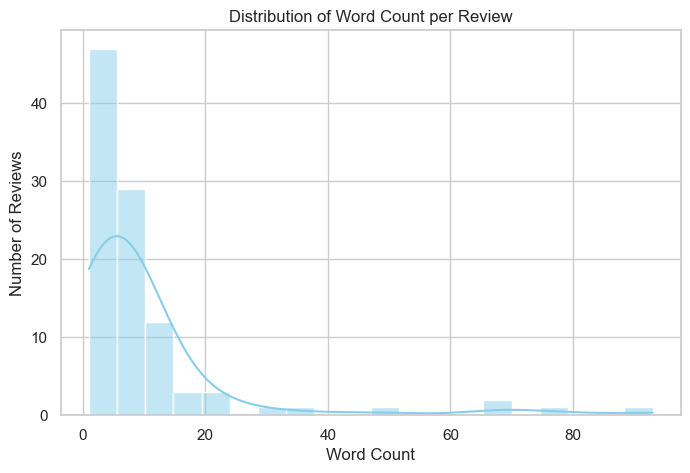

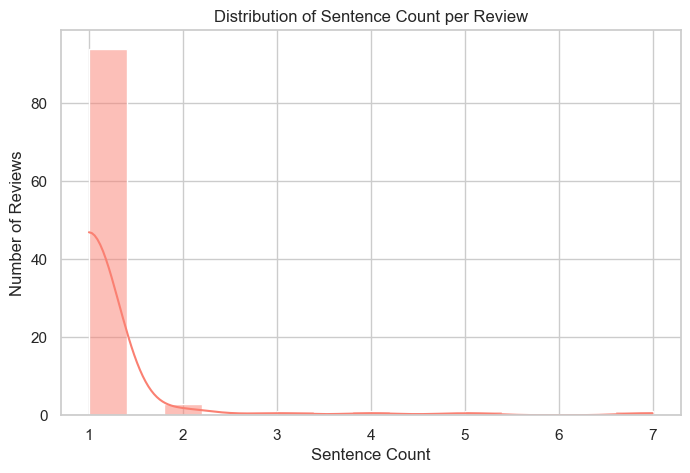

In [23]:
plt.figure()
sns.histplot(df['word_count'], bins=20, color='skyblue', kde=True)
plt.title("Distribution of Word Count per Review")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.show()

plt.figure()
sns.histplot(df['sent_count'], bins=15, color='salmon', kde=True)
plt.title("Distribution of Sentence Count per Review")
plt.xlabel("Sentence Count")
plt.ylabel("Number of Reviews")
plt.show()

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = WordNetLemmatizer()

def preprocess_tokens(text):
    tokens = word_tokenize(text)
    # remove punctuation tokens and stopwords
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

def stem_tokens(tokens):
    return [ps.stem(t) for t in tokens]

def lemmatize_tokens(tokens):
    return [wnl.lemmatize(t) for t in tokens]

# add columns with tokens, stems, lemmas
df['tokens'] = df['eng_review'].apply(preprocess_tokens)
df['stems'] = df['tokens'].apply(stem_tokens)
df['lemmas'] = df['tokens'].apply(lemmatize_tokens)
df[['tokens','stems','lemmas']].head()

,tokens,stems,lemmas
0,"[nice, phone, normal, uses, fancy, design, cem...","[nice, phone, normal, use, fanci, design, cemr...","[nice, phone, normal, us, fancy, design, cemra..."
1,[nice],[nice],[nice]
2,"[sound, quality, good]","[sound, qualiti, good]","[sound, quality, good]"
3,"[osm, nice, phone, iam, happy, thank, filpkart]","[osm, nice, phone, iam, happi, thank, filpkart]","[osm, nice, phone, iam, happy, thank, filpkart]"
4,"[really, awesome, handset, according]","[realli, awesom, handset, accord]","[really, awesome, handset, according]"


C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\3907494608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='cubehelix')


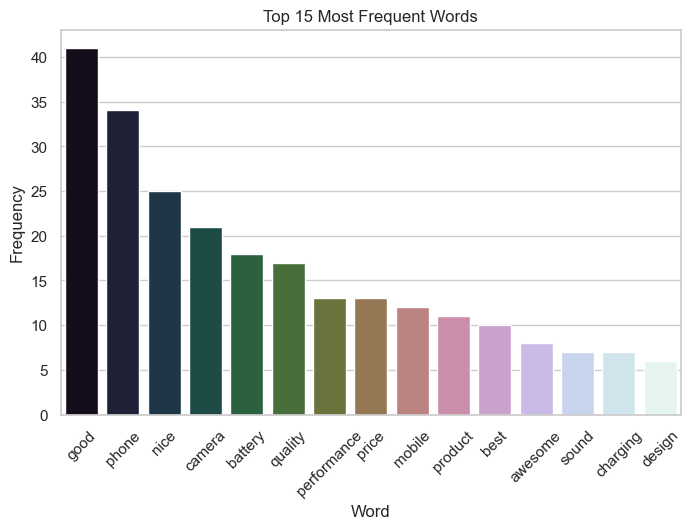

In [28]:
from collections import Counter
import itertools
all_words = list(itertools.chain.from_iterable(df['lemmas']))
common_words = Counter(all_words).most_common(15)

words, counts = zip(*common_words)
plt.figure()
sns.barplot(x=list(words), y=list(counts), palette='cubehelix')
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Phase 2: Syntactic & Semantic Analysis

2.1. Part-of-Speech (POS) Tagging : 

In [29]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [30]:
from nltk import pos_tag

df['pos_tags'] = df['tokens'].apply(pos_tag)
# show most common POS tags (basic count)
from collections import Counter
all_pos = Counter(tag for row in df['pos_tags'] for (_,tag) in row)
print(all_pos.most_common(15))


[('NN', 287), ('JJ', 130), ('RB', 34), ('VBG', 24), ('NNS', 17), ('VBP', 14), ('VB', 11), ('JJS', 9), ('IN', 6), ('VBZ', 5), ('MD', 5), ('VBD', 5), ('VBN', 4), ('CD', 3), ('JJR', 2)]


C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\653399206.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_counts.keys())[:15], y=list(pos_counts.values())[:15], palette='crest')


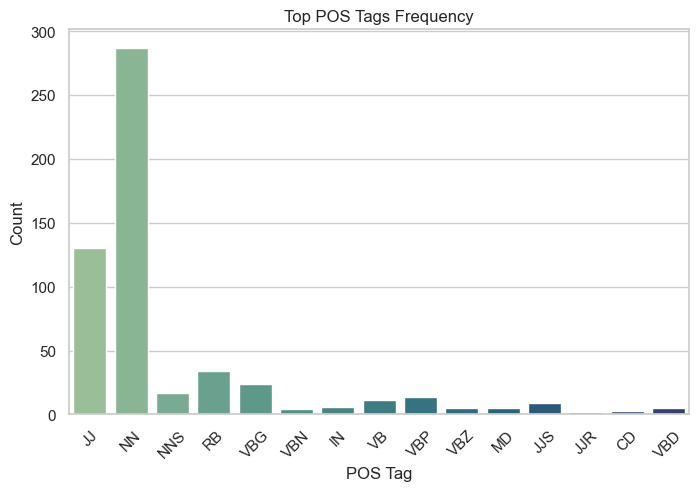

In [32]:
from collections import Counter
import itertools

# Flatten all POS tags
all_pos = list(itertools.chain.from_iterable([[pos for _, pos in tags] for tags in df['pos_tags']]))
pos_counts = Counter(all_pos)

plt.figure()
sns.barplot(x=list(pos_counts.keys())[:15], y=list(pos_counts.values())[:15], palette='crest')
plt.title("Top POS Tags Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

2.2. Information Extraction - Named Entity Recognition (NER):

In [33]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [34]:
#Extracting the named entity form the reviews
from nltk import ne_chunk, pos_tag
df['pos_tags'] = df['tokens'].apply(pos_tag)

def extract_named_entities(pos_tagged):
    tree = ne_chunk(pos_tagged)
    entities = []
    for subtree in tree:
        if hasattr(subtree, 'label'):
            ent = " ".join([token for token, pos in subtree.leaves()])
            entities.append((ent, subtree.label()))
    return entities

df['capitalized_review'] = df['eng_review'].str.title()
df['tokens_cap'] = df['capitalized_review'].apply(word_tokenize)
df['pos_tags_cap'] = df['tokens_cap'].apply(pos_tag)
df['named_entities'] = df['pos_tags_cap'].apply(extract_named_entities)

In [35]:
df['named_entities'].head()

0    [(Normal Uses Fancy, PERSON), (Plz, PERSON)]
1                                              []
2      [(Sound, PERSON), (Quality, ORGANIZATION)]
3      [(Osm, PERSON), (Very Nice, ORGANIZATION)]
4                     [(Awesome Handset, PERSON)]
Name: named_entities, dtype: object

2.3. Representating Bag-of-Words & TF-IDF using scikit-learn

In [36]:
#installing scikit-learn to perform TF-IDF, or Term Frequency-Inverse Document Frequency
!pip install scikit-learn

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# join lemmas back to text
df['lemma_text'] = df['lemmas'].apply(lambda toks: " ".join(toks))

# Bag-of-Words (unigrams)
cv = CountVectorizer(ngram_range=(1,1), min_df=2)
bow = cv.fit_transform(df['lemma_text'])

# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
tfidf_mat = tfidf.fit_transform(df['lemma_text'])

print("Vocabulary size (bow):", len(cv.vocabulary_))
print("TF-IDF shape:", tfidf_mat.shape)


Vocabulary size (bow): 67
TF-IDF shape: (101, 102)


2.4. Word embeddings with Word2Vec using gensim

In [38]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [39]:
# pip install gensim

from gensim.models import Word2Vec

# prepare sentences as lists of tokens
sentences = df['lemmas'].tolist()

# train small Word2Vec (simple parameters)
w2v = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, workers=2, epochs=20)

# example: find most similar words to 'battery' (if present)
if 'battery' in w2v.wv:
    print(w2v.wv.most_similar('battery', topn=5))
else:
    print("word 'battery' not in vocab")


[('sound', 0.47274649143218994), ('quality', 0.3430711627006531), ('backup', 0.3283196985721588), ('camera', 0.32182323932647705), ('mode', 0.30377086997032166)]


2.5.Using N-grams / N-gram language model probability 

In [40]:
from collections import defaultdict, Counter
import math
from nltk.util import ngrams

# Build counts
unigram_counts = Counter()
bigram_counts = Counter()
total_unigrams = 0

for tokens in df['lemmas']:
    unigrams = tokens
    bigrams = list(ngrams(tokens, 2))
    unigram_counts.update(unigrams)
    bigram_counts.update(bigrams)
    total_unigrams += len(unigrams)

# adding one Laplace smoothed probability for a bigram
V = len(unigram_counts)  # vocabulary size

def bigram_prob(w_prev, w):
    # P(w | w_prev) with add-1 smoothing
    return (bigram_counts[(w_prev, w)] + 1) / (unigram_counts[w_prev] + V)

# Example usage:
print("P('good'|'very') approx:", bigram_prob('very', 'good'))


P('good'|'very') approx: 0.004694835680751174


2.6. Topic modeling: LSA (TruncatedSVD on TF-IDF) and LDA (gensim) : 

2.6.1.  LSA using TruncatedSVD on TF-IDF : 

In [41]:
# pip install scikit-learn

from sklearn.decomposition import TruncatedSVD
n_topics = 5
svd = TruncatedSVD(n_components=n_topics, random_state=0)
lsa = svd.fit_transform(tfidf_mat)

# Printing top terms per topic
terms = tfidf.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    terms_in_topic = [terms[idx] for idx in comp.argsort()[-10:][::-1]]
    print("Topic", i, ":", terms_in_topic)


Topic 0 : ['good', 'phone', 'nice', 'performance', 'battery', 'camera', 'quality', 'product', 'mobile', 'best']
Topic 1 : ['nice', 'phone', 'nice phone', 'happy', 'price', 'best', 'nice mobile', 'best phone', 'nice product', 'mobile']
Topic 2 : ['phone', 'best', 'price', 'best phone', 'super', 'phone price', 'range', 'quality', 'design', 'phone camera']
Topic 3 : ['battery', 'quality', 'best', 'camera', 'mobile', 'awesome', 'price', 'camera quality', 'problem', 'average']
Topic 4 : ['mobile', 'problem', 'charging', 'super', 'nice mobile', 'phone', 'battery', 'ok', 'disappointed', 'disappointed battery']


C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2144333878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')


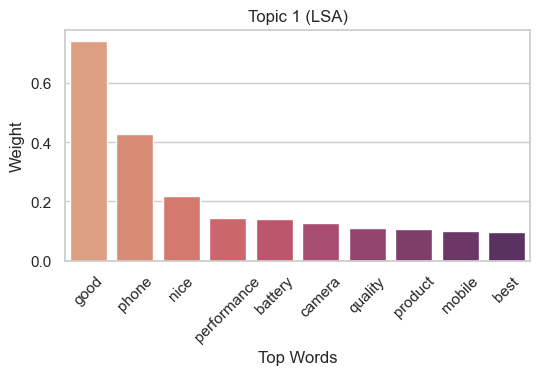

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2144333878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')


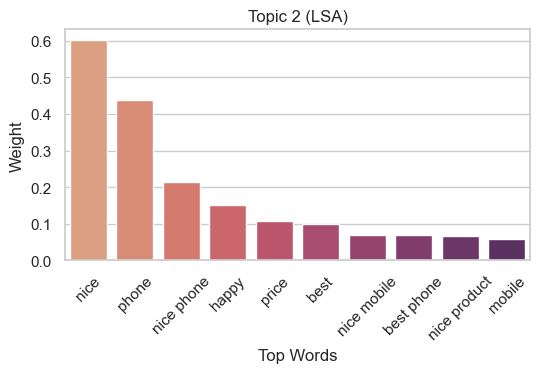

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2144333878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')


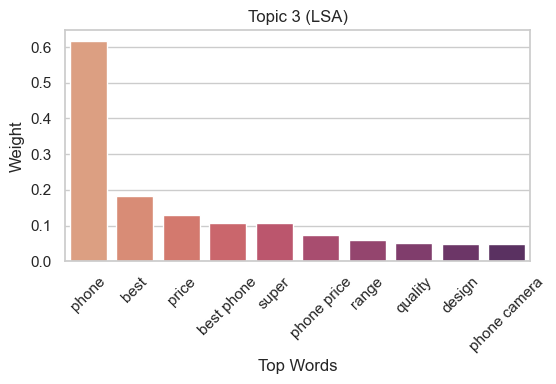

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2144333878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')


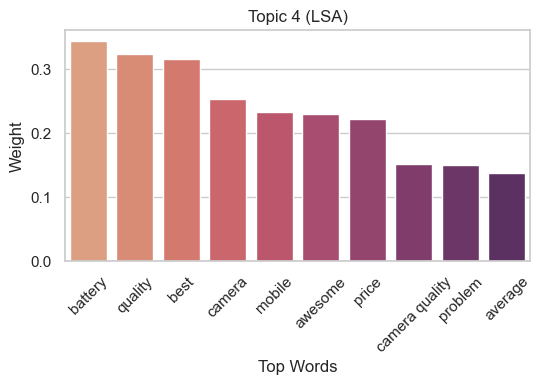

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2144333878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')


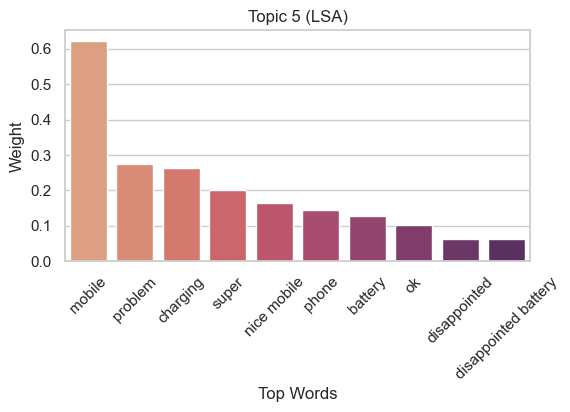

In [42]:
terms = tfidf.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    plt.rcParams['figure.figsize'] = (6, 3)
    terms_in_topic = [terms[idx] for idx in comp.argsort()[-10:][::-1]]
    sns.barplot(x=list(range(10)), y=comp[comp.argsort()[-10:][::-1]], palette='flare')
    plt.xticks(list(range(10)), terms_in_topic, rotation=45)
    plt.title(f"Topic {i+1} (LSA)")
    plt.xlabel("Top Words")
    plt.ylabel("Weight")
    plt.show()

2.6.2. LDA using gensim :

In [43]:
# pip install gensim

from gensim import corpora
from gensim.models.ldamodel import LdaModel

# preparing dictionary and corpus
dictionary = corpora.Dictionary(df['lemmas'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['lemmas']]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=0, passes=10)
for idx in range(5):
    print("Topic", idx, ":", lda.print_topic(idx, topn=8))


Topic 0 : 0.344*"phone" + 0.105*"best" + 0.093*"price" + 0.085*"nice" + 0.059*"camera" + 0.053*"design" + 0.045*"range" + 0.044*"quality"
Topic 1 : 0.263*"nice" + 0.240*"mobile" + 0.107*"charging" + 0.102*"camera" + 0.092*"problem" + 0.074*"battery" + 0.026*"performance" + 0.024*"design"
Topic 2 : 0.278*"product" + 0.211*"performance" + 0.142*"good" + 0.106*"price" + 0.082*"happy" + 0.056*"better" + 0.031*"range" + 0.030*"flipkart"
Topic 3 : 0.346*"awesome" + 0.177*"nice" + 0.111*"looking" + 0.091*"flipkart" + 0.071*"performance" + 0.036*"quality" + 0.035*"problem" + 0.015*"mobile"
Topic 4 : 0.397*"good" + 0.177*"battery" + 0.157*"quality" + 0.136*"camera" + 0.039*"better" + 0.025*"charging" + 0.013*"range" + 0.012*"phone"


C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2528575872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights), y=list(words), palette='viridis')


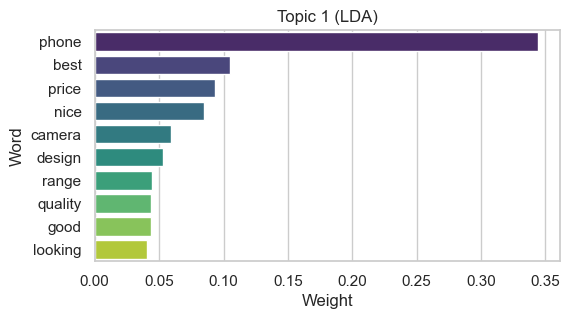

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2528575872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights), y=list(words), palette='viridis')


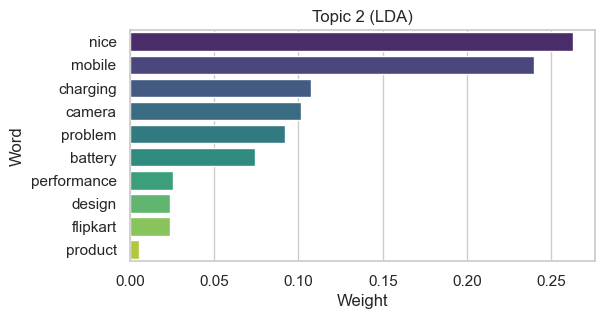

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2528575872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights), y=list(words), palette='viridis')


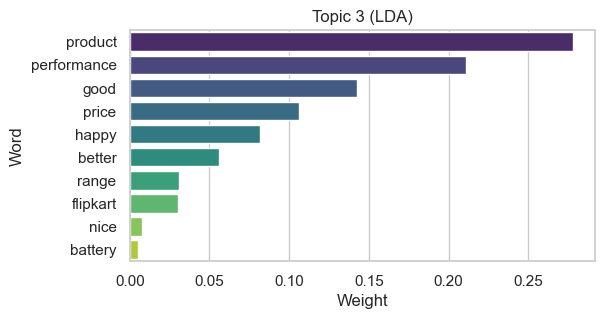

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2528575872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights), y=list(words), palette='viridis')


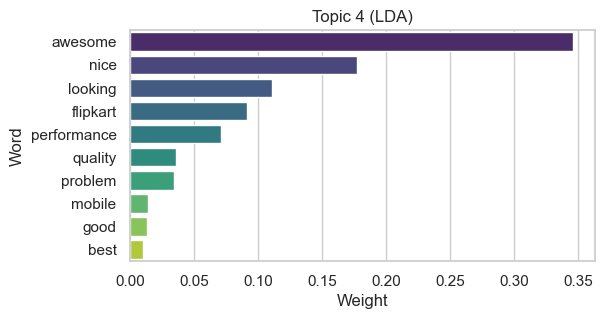

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\2528575872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights), y=list(words), palette='viridis')


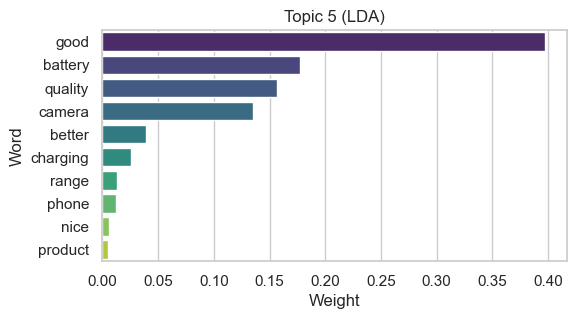

In [44]:
topics = lda.show_topics(num_topics=5, num_words=10, formatted=False)
for i, topic in topics:
    plt.rcParams['figure.figsize'] = (6, 3)
    words, weights = zip(*topic)
    sns.barplot(x=list(weights), y=list(words), palette='viridis')
    plt.title(f"Topic {i+1} (LDA)")
    plt.xlabel("Weight")
    plt.ylabel("Word")
    plt.show()


2.7. Sentiment analysis: Lexicon-based using VADER

In [45]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df['vader_scores'] = df['eng_review'].apply(lambda t: sia.polarity_scores(t))
df['vader_compound'] = df['vader_scores'].apply(lambda d: d['compound'])
df['sentiment_label'] = df['vader_compound'].apply(lambda x: 'pos' if x>0.05 else ('neg' if x<-0.05 else 'neu'))
df['sentiment_label'].value_counts()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment_label
pos    75
neg    13
neu    13
Name: count, dtype: int64

C:\Users\prasa\AppData\Local\Temp\ipykernel_30268\3767730654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sent_counts.index, y=sent_counts.values, palette='coolwarm')


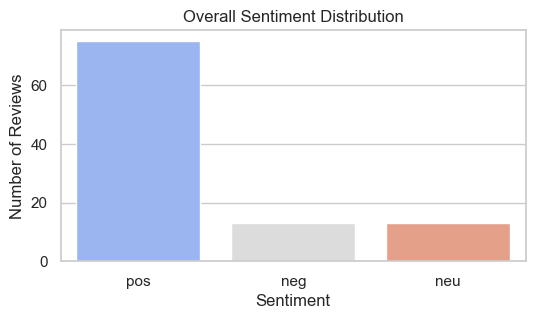

In [46]:
sent_counts = df['sentiment_label'].value_counts()

plt.figure()
sns.barplot(x=sent_counts.index, y=sent_counts.values, palette='coolwarm')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

2.8. Text classification using TF-IDF + SVM 

In [47]:
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# If you have labels (e.g., sentiment_label from VADER as proxy), you can train
X = tfidf_mat
y = df['sentiment_label']  # using VADER labels as pseudo-labels (for demonstration)

# only keep pos/neg (drop neu) for cleaner binary classification
mask = y.isin(['pos','neg'])
X2 = X[mask.values]
y2 = y[mask.values]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
clf = LinearSVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

         neg       1.00      0.25      0.40         4
         pos       0.82      1.00      0.90        14

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18



C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


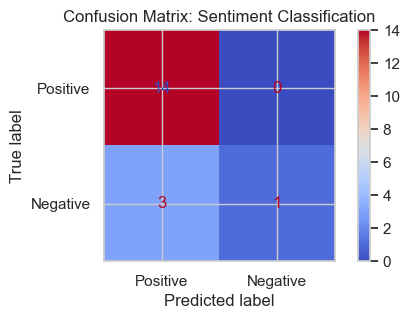

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=['pos', 'neg'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix: Sentiment Classification")
plt.show()

Phase 3 : Advanced Analysis & Application

3.1. Review Summarization using Similarity Index.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def top_similar(word, topn=5):
    if word not in w2v.wv:
        return []
    vec = w2v.wv[word].reshape(1,-1)
    all_words = w2v.wv.index_to_key
    sims = cosine_similarity(vec, w2v.wv[all_words])
    pairs = list(zip(all_words, sims.flatten()))
    pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
    return pairs[1:topn+1]  # skip the word itself


features = ['battery', 'camera', 'display', 'price', 'performance']
for f in features:
    print("Feature:", f, "->", top_similar(f, topn=5))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances

num_clusters = 5
km = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)  # set n_init explicitly to remove warning
km.fit(tfidf_mat)
clusters = km.labels_
df['cluster'] = clusters

# for each cluster pick the review closest to the centroid
representative_reviews = []
for c in range(num_clusters):
    idxs = (df['cluster'] == c)
    if idxs.sum() == 0:
        continue
    cluster_vecs = tfidf_mat[idxs.values]  
    centroid = km.cluster_centers_[c].reshape(1, -1)
    dists = cosine_distances(cluster_vecs, centroid)
    best_idx_in_cluster = dists.argmin()
    real_idx = df[idxs].index[best_idx_in_cluster]
    representative_reviews.append((c, df.loc[real_idx, 'eng_review']))

print("Representative reviews per cluster:\n")
for c, rev in representative_reviews:
    print(f"Cluster {c} -> {rev}\n")


3.2. Question Answering :

In [ ]:
questions = [
    "Is the battery life good?",
    "How is the camera?",
    "Is the phone value for money?"
]

def answer_question(q):
    # naive keyword matching for relevant reviews
    keywords = []
    if 'battery' in q:
        keywords = ['battery', 'charge', 'charging', 'battery-life']
    elif 'camera' in q:
        keywords = ['camera', 'photo', 'picture', 'video']
    elif 'value' in q or 'money' in q:
        keywords = ['price', 'value', 'worth', 'cost']

    # filter reviews mentioning any keyword
    mask = df['lemma_text'].apply(lambda text: any(k in text for k in keywords))
    subset = df[mask]
    if subset.empty:
        return "No clear mentions found in reviews."
    # sentiment in subset
    pos = (subset['vader_compound'] > 0.05).sum()
    neg = (subset['vader_compound'] < -0.05).sum()
    neu = ((subset['vader_compound'] >= -0.05) & (subset['vader_compound'] <= 0.05)).sum()
    summary = f"Mentions: {len(subset)}. Pos:{pos}, Neg:{neg}, Neu:{neu}. Example: {subset.iloc[0]['eng_review'][:200]}..."
    return summary

for q in questions:
    print("Q:", q)
    print("A:", answer_question(q))
    print()


In [ ]:
#Code for taking inputs from user 
import re

def answer_question(question, df):
    question = question.lower().strip()

    # Define some simple keyword mappings
    keyword_map = {
        'battery': ['battery', 'charge', 'charging', 'backup', 'power'],
        'camera': ['camera', 'photo', 'picture', 'selfie', 'video'],
        'display': ['display', 'screen', 'resolution', 'brightness'],
        'performance': ['performance', 'speed', 'lag', 'processor'],
        'price': ['price', 'value', 'cost', 'money', 'worth'],
        'design': ['design', 'look', 'style', 'build'],
        'sound': ['sound', 'speaker', 'audio', 'volume'],
    }

    # Find which category matches the question
    selected_keywords = []
    for key, words in keyword_map.items():
        if any(word in question for word in words):
            selected_keywords = words
            break

    if not selected_keywords:
        return "Sorry, I couldn’t understand that topic. Try asking about battery, camera, display, or performance."

    # Filter reviews containing any of the selected keywords
    mask = df['eng_review'].apply(
        lambda text: any(re.search(rf'\b{kw}\b', text.lower()) for kw in selected_keywords)
    )
    subset = df[mask]

    if subset.empty:
        return "No clear mentions found in reviews related to your question."

    # Count sentiment for the filtered subset
    pos = (subset['vader_compound'] > 0.05).sum()
    neg = (subset['vader_compound'] < -0.05).sum()
    neu = ((subset['vader_compound'] >= -0.05) & (subset['vader_compound'] <= 0.05)).sum()

    total = pos + neg + neu
    if total == 0:
        return "No clear sentiment found for this topic."
    best_review = subset.loc[subset['vader_compound'].abs().idxmax(), 'eng_review']

    summary = (
        f"Out of {total} reviews mentioning this topic:\n"
        f"Positive: {pos}\n"
        f"Negative: {neg}\n"
        f"Neutral: {neu}\n\n"
        f"Example review: \"{best_review}\""
    )

    return summary

while True:
    user_q = input("\nAsk a question about the product (or type 'exit' to quit): ")
    if user_q.lower() in ['exit', 'quit']:
        print("Goodbye! 👋")
        break

    response = answer_question(user_q, df)
    print("\n--- Answer ---")
    print(response)
